<a href="https://colab.research.google.com/github/jellyXuuuuu/CovidNetDeepLearning/blob/main/1covid19model_ex_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare for package

In [1]:

!python --version

Python 3.7.11


In [2]:
# !pip install -q condacolab

In [3]:
# import condacolab
# condacolab.install()

In [4]:

# !apt-get install python3.6

In [5]:
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
# !python --version

In [6]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.11.0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local


--2022-12-08 02:08:23--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh [following]
--2022-12-08 02:08:23--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103730670 (99M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.11.0-Linux-x86_64.sh.1’

     0K .......... .......... .......... .......... ..........  0% 13.6M 7s
    50K .......... .......... .........

In [7]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [8]:
# !conda install python=3.6


In [9]:
!pip install tensorflow==1.13.1
# !pip install tensorflow==1.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (92.6 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 1.13.1 which is incompatible.
tensorflow-gpu 1

In [10]:
# %tensorflow_version 1.x
# import tensorflow as tf

In [11]:
!pip uninstall tensorflow -y
!pip install tensorflow-gpu==1.15
!apt install --allow-change-held-packages libcudnn7=7.4.1.5-1+cuda10.0y

Found existing installation: tensorflow 1.13.1
Uninstalling tensorflow-1.13.1:
  Successfully uninstalled tensorflow-1.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Version '7.4.1.5-1+cuda10.0y' for 'libcudnn7' was not found


In [12]:
import tensorflow as tf
print( tf.__version__ )

2.9.2


# Load files

In [13]:
!cp -r 'drive/MyDrive/covid/models/' .

In [14]:
!cp -r 'drive/MyDrive/covid/labels/' .

In [15]:
!cp -r 'drive/MyDrive/covid/assets/' .

# Grad-cam using tenserflow

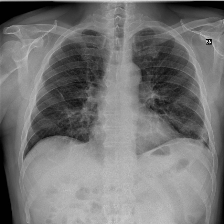

In [16]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from google.colab.patches import cv2_imshow

# imagepath = './covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg'
imagepath = "assets/ex-covid.jpeg"
img_m = cv.imread(imagepath)
img_m = cv.resize(img_m, (224, 224))

# display(Image(imagepath))
cv2_imshow(img_m)

Instructions for updating:
non-resource variables are not supported in the long term


pred [[0.01225158 0.98774844]]
Prediction: positive
Confidence
Negative: 0.012 Positive: 0.988
**DISCLAIMER**
Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.


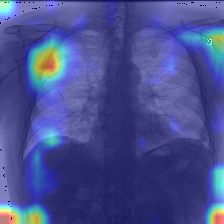

In [18]:
import cv2 as cv
# import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
import os, argparse

from google.colab.patches import cv2_imshow

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img


 
# arguments:
IMAGE_PATH ="assets/ex-covid.jpeg"
output_node_names = "norm_dense_2/Softmax"
final_conv_name="post_relu/Relu"  
#post_relu/Relu,post_bn/cond/FusedBatchNorm, conv5_block3_out/add, conv5_block3_3_conv/convolution, conv5_block3_1_conv/convolution, conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
model_path = 'models/COVIDNet-CXR-2/model'

# USE COVIDNet CXR 2
args_weightspath = 'models/COVIDNet-CXR-2' 
args_metaname = 'model.meta'
args_ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'norm_dense_2/Softmax:0'
args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = False

args_in_tensorname = 'input_1:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 480
args_input_size_medusa = 256
args_top_percent = 0.08


# ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

with tf.Session() as sess:
    saver.restore(sess, model_path)  # load arguments using restore automatically


    img_m_0 = cv.imread(IMAGE_PATH)
    img_m_0 = cv.resize(img_m_0, (224, 224))
    # img_m = tf.cast(img_m_0, tf.float32)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

    '''
    /////////////////////////////////////////// inference related
    '''
    
    if args_is_severity_model:
      # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
      mapping = {'level2': 0, 'level1': 1}
      inv_mapping = {0: 'level2', 1: 'level1'}
    elif args_n_classes == 2:
      # For COVID-19 positive/negative detection
      mapping = {'negative': 0, 'positive': 1}
      inv_mapping = {0: 'negative', 1: 'positive'}
    elif args_n_classes == 3:
      # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
      mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
      inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
    else:
      raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
          or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

    '''
    \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    '''

    image_tensor = sess.graph.get_tensor_by_name("input_1:0") # args_in_tensorname "input_1:0"
    pred_tensor = sess.graph.get_tensor_by_name('norm_dense_2/Softmax:0') # args_out_tensorname 'norm_dense_2/Softmax:0'
    
    if args_is_medusa_backbone:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
        x = x.astype('float32') / 255.0
        medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
        medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
        feed_dict = {
                    medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                    image_tensor: np.expand_dims(x, axis=0),
                } 
        # print("args_is_medusa_backbone")
    else:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
        x = x.astype('float32') / 255.0
        feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
        # print("Not args_is_medusa_backbone")
    pred = sess.run(pred_tensor, feed_dict=feed_dict)
    print("pred", pred)

    print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
    print('Confidence')
    print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
    print('**DISCLAIMER**')
    print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

    
    # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
    # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
    # x = x.astype('float32') / 255.0
    # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


In [27]:
cv.imwrite(f'1-excovid_cam.jpg', dst_m)
# dst_m write into folder

True

make a folder and copy it into mydrive

In [28]:
!mkdir output

In [29]:
!mv '1-excovid_cam.jpg' 'output/1-excovid_cam.jpg'

In [30]:
!cp -r 'output/' 'drive/MyDrive/covid'

# Comparation

## Load other dataset

In [19]:
# covid-chestxray-dataset
!wget https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip

--2022-12-08 02:11:29--  https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master [following]
--2022-12-08 02:11:30--  https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [<=>                 ] 525.03M  20.5MB/s    in 26s     

2022-12-08 02:11:55 (20.5 MB/s) - ‘master.zip’ saved [550535079]



In [20]:
!unzip master.zip

Archive:  master.zip
78543292f8b01d5e0ed1d0e15dce71949f0657bb
   creating: covid-chestxray-dataset-master/
   creating: covid-chestxray-dataset-master/.github/
 extracting: covid-chestxray-dataset-master/.github/FUNDING.yml  
   creating: covid-chestxray-dataset-master/.github/workflows/
  inflating: covid-chestxray-dataset-master/.github/workflows/tests.yml  
  inflating: covid-chestxray-dataset-master/.gitignore  
  inflating: covid-chestxray-dataset-master/README.md  
  inflating: covid-chestxray-dataset-master/SCHEMA.md  
   creating: covid-chestxray-dataset-master/annotations/
  inflating: covid-chestxray-dataset-master/annotations/covid-severity-scores.csv  
  inflating: covid-chestxray-dataset-master/annotations/imageannotation_ai_lung_bounding_boxes.json  
   creating: covid-chestxray-dataset-master/annotations/lungVAE-masks/
  inflating: covid-chestxray-dataset-master/annotations/lungVAE-masks/1-s2.0-S0140673620303706-fx1_lrg_mask.png  
  inflating: covid-chestxray-dataset-mas

## Test
- All the images highly might be detected as positive since they came from an *open dataset of chest X-ray and CT images of patients which are positive or suspected of COVID-19 or other viral and bacterial pneumonias* ([https://github.com/ieee8023/covid-chestxray-dataset/](https://github.com/ieee8023/covid-chestxray-dataset/)).

In [21]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from sklearn.metrics import confusion_matrix
import os, argparse

from google.colab.patches import cv2_imshow
def show_org(IMAGE_PATH):
  imagepath = IMAGE_PATH
  img_m = cv.imread(imagepath)
  img_m = cv.resize(img_m, (224, 224))
  # display(Image(imagepath))
  cv2_imshow(img_m)
  

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def main_grad_cam(IMAGE_PATH, MODEL_NAME):
  # arguments:
  IMAGE_PATH = IMAGE_PATH
  output_node_names = "norm_dense_2/Softmax"
  final_conv_name="conv5_block3_1_conv/convolution"  #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
  model_path = MODEL_NAME

  # USE COVIDNet CXR 2
  args_weightspath = 'models/COVIDNet-CXR-2' 
  args_metaname = 'model.meta'
  args_ckptname = 'model'
  args_n_classes = 2

  args_testfolder = 'data/test'
  args_trainfile = 'labels/train_COVIDx9B.txt'
  args_testfile = 'labels/test_COVIDx9B.txt'

  args_out_tensorname = 'norm_dense_2/Softmax:0'
  args_logit_tensorname = 'norm_dense_2/MatMul:0'
  args_is_severity_model = False
  args_is_medusa_backbone = False

  args_in_tensorname = 'input_1:0'
  args_in_tensorname_medusa = 'input_1:0'
  args_input_size = 480
  args_input_size_medusa = 256
  args_top_percent = 0.08

  # ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
  saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

  with tf.Session() as sess:
      saver.restore(sess, model_path)  # load arguments using restore automatically


      img_m_0 = cv.imread(IMAGE_PATH)
      img_m_0 = cv.resize(img_m_0, (224, 224))
      # img_m = tf.cast(img_m_0, tf.float32)
      # img_m = tf.reshape(img_m, [224, 224, 3])
      # img_m_f= sess.run([img_m])
      # print("img_m4", img_m)  # shape 480,480,3
      # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

      '''
      /////////////////////////////////////////// inference related
      '''
      
      if args_is_severity_model:
        # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
        mapping = {'level2': 0, 'level1': 1}
        inv_mapping = {0: 'level2', 1: 'level1'}
      elif args_n_classes == 2:
        # For COVID-19 positive/negative detection
        mapping = {'negative': 0, 'positive': 1}
        inv_mapping = {0: 'negative', 1: 'positive'}
      elif args_n_classes == 3:
        # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
        mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
        inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
      else:
        raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
            or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

      '''
      \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
      '''

      image_tensor = sess.graph.get_tensor_by_name("input_1:0") # args_in_tensorname "input_1:0"
      pred_tensor = sess.graph.get_tensor_by_name('norm_dense_2/Softmax:0') # args_out_tensorname 'norm_dense_2/Softmax:0'
      
      if args_is_medusa_backbone:
          x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
          x = x.astype('float32') / 255.0
          medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
          medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
          feed_dict = {
                      medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                      image_tensor: np.expand_dims(x, axis=0),
                  } 
          # print("args_is_medusa_backbone")
      else:
          x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
          x = x.astype('float32') / 255.0
          feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
          # print("Not args_is_medusa_backbone")
      pred = sess.run(pred_tensor, feed_dict=feed_dict)
      print("pred", pred)

      print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
      print('Confidence')
      print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
      print('**DISCLAIMER**')
      print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

      
      # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
      # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

      # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
      # x = x.astype('float32') / 255.0
      # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
      # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

      cam=grad_cam(prob_name=output_node_names, label=0, 
                    layer_name=final_conv_name, sess=sess, 
                    feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                    nb_classes=2)

      # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
      image_batch = img_m_0[None, :, :, :3]
      image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

      dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
      cv2_imshow(dst_m)
      # cv.imshow('dst_m_v',dst_m)
      cv.waitKey(0)


### 000001-1.jpg
- ./covid-chestxray-dataset-master/images/000001-1.jpg
- result for inference:
```
pred [[0.8663935  0.13360655]]
Prediction: negative
Confidence
Negative: 0.866 Positive: 0.134
```



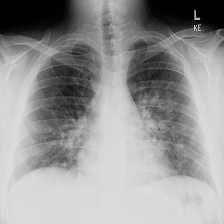

In [22]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from google.colab.patches import cv2_imshow

imagepath = "./covid-chestxray-dataset-master/images/000001-1.jpg"
img_m = cv.imread(imagepath)
img_m = cv.resize(img_m, (224, 224))

# display(Image(imagepath))
cv2_imshow(img_m)

pred [[0.8663934  0.13360658]]
Prediction: negative
Confidence
Negative: 0.866 Positive: 0.134
**DISCLAIMER**
Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.


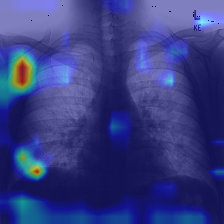

In [31]:
import cv2 as cv
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import numpy as np
# import tensorflow as tf
import os, argparse

from google.colab.patches import cv2_imshow

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img


 
# arguments:
IMAGE_PATH = "./covid-chestxray-dataset-master/images/000001-1.jpg"
output_node_names = "norm_dense_2/Softmax"
final_conv_name="post_relu/Relu"  #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
model_path = 'models/COVIDNet-CXR-2/model'

# USE COVIDNet CXR 2
args_weightspath = 'models/COVIDNet-CXR-2' 
args_metaname = 'model.meta'
args_ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'norm_dense_2/Softmax:0'
args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = False

args_in_tensorname = 'input_1:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 480
args_input_size_medusa = 256
args_top_percent = 0.08


# ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
# saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

with tf.Session() as sess:
    saver.restore(sess, model_path)  # load arguments using restore automatically


    img_m_0 = cv.imread(IMAGE_PATH)
    img_m_0 = cv.resize(img_m_0, (224, 224))
    # img_m = tf.cast(img_m_0, tf.float32)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

    '''
    /////////////////////////////////////////// inference related
    '''
    
    if args_is_severity_model:
      # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
      mapping = {'level2': 0, 'level1': 1}
      inv_mapping = {0: 'level2', 1: 'level1'}
    elif args_n_classes == 2:
      # For COVID-19 positive/negative detection
      mapping = {'negative': 0, 'positive': 1}
      inv_mapping = {0: 'negative', 1: 'positive'}
    elif args_n_classes == 3:
      # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
      mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
      inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
    else:
      raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
          or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

    '''
    \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    '''

    image_tensor = sess.graph.get_tensor_by_name("input_1:0") # args_in_tensorname "input_1:0"
    pred_tensor = sess.graph.get_tensor_by_name('norm_dense_2/Softmax:0') # args_out_tensorname 'norm_dense_2/Softmax:0'
    
    if args_is_medusa_backbone:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
        x = x.astype('float32') / 255.0
        medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
        medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
        feed_dict = {
                    medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                    image_tensor: np.expand_dims(x, axis=0),
                } 
        # print("args_is_medusa_backbone")
    else:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
        x = x.astype('float32') / 255.0
        feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
        # print("Not args_is_medusa_backbone")
    pred = sess.run(pred_tensor, feed_dict=feed_dict)
    print("pred", pred)

    print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
    print('Confidence')
    print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
    print('**DISCLAIMER**')
    print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

    
    # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
    # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
    # x = x.astype('float32') / 255.0
    # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


In [32]:
cv.imwrite(f'2-000001-1.jpg', dst_m)
# dst_m write into folder

True

In [33]:
!mv '2-000001-1.jpg' 'output/'

In [34]:
!cp -r 'output/' 'drive/MyDrive/covid'

### nejmoa2001191_f5-PA.jpeg
- ./covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg
- result for inference:
```
pred [[2.3010748e-06 9.9999774e-01]]
Prediction: positive
Confidence
Negative: 0.000 Positive: 1.000
```

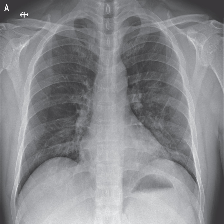

In [35]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from google.colab.patches import cv2_imshow

imagepath = "./covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg"
img_m = cv.imread(imagepath)
img_m = cv.resize(img_m, (224, 224))

# display(Image(imagepath))
cv2_imshow(img_m)

pred [[2.3011407e-06 9.9999774e-01]]
Prediction: positive
Confidence
Negative: 0.000 Positive: 1.000
**DISCLAIMER**
Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.


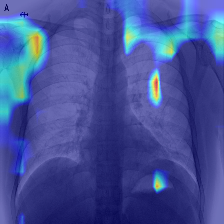

In [46]:
import cv2 as cv
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import os, argparse

from google.colab.patches import cv2_imshow

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img


 
# arguments:
IMAGE_PATH ="./covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg"
output_node_names = "norm_dense_2/Softmax"
final_conv_name="post_relu/Relu"  #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
model_path = 'models/COVIDNet-CXR-2/model'

# USE COVIDNet CXR 2
args_weightspath = 'models/COVIDNet-CXR-2' 
args_metaname = 'model.meta'
args_ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'norm_dense_2/Softmax:0'
args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = False

args_in_tensorname = 'input_1:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 480
args_input_size_medusa = 256
args_top_percent = 0.08


# ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
# saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

with tf.Session() as sess:
    saver.restore(sess, model_path)  # load arguments using restore automatically


    img_m_0 = cv.imread(IMAGE_PATH)
    img_m_0 = cv.resize(img_m_0, (224, 224))
    # img_m = tf.cast(img_m_0, tf.float32)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

    '''
    /////////////////////////////////////////// inference related
    '''
    
    if args_is_severity_model:
      # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
      mapping = {'level2': 0, 'level1': 1}
      inv_mapping = {0: 'level2', 1: 'level1'}
    elif args_n_classes == 2:
      # For COVID-19 positive/negative detection
      mapping = {'negative': 0, 'positive': 1}
      inv_mapping = {0: 'negative', 1: 'positive'}
    elif args_n_classes == 3:
      # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
      mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
      inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
    else:
      raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
          or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

    '''
    \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    '''

    image_tensor = sess.graph.get_tensor_by_name("input_1:0") # args_in_tensorname "input_1:0"
    pred_tensor = sess.graph.get_tensor_by_name('norm_dense_2/Softmax:0') # args_out_tensorname 'norm_dense_2/Softmax:0'
    
    if args_is_medusa_backbone:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
        x = x.astype('float32') / 255.0
        medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
        medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
        feed_dict = {
                    medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                    image_tensor: np.expand_dims(x, axis=0),
                } 
        # print("args_is_medusa_backbone")
    else:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
        x = x.astype('float32') / 255.0
        feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
        # print("Not args_is_medusa_backbone")
    pred = sess.run(pred_tensor, feed_dict=feed_dict)
    print("pred", pred)

    print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
    print('Confidence')
    print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
    print('**DISCLAIMER**')
    print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

    
    # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
    # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
    # x = x.astype('float32') / 255.0
    # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


In [47]:
cv.imwrite(f'3-nejmoa2001191_f5-PA.jpeg', dst_m)
# dst_m write into folder

True

In [48]:
!mv '3-nejmoa2001191_f5-PA.jpeg' 'output/'

In [49]:
!cp -r 'output/' 'drive/MyDrive/covid'

### 000002-1.jpg
- "./covid-chestxray-dataset-master/images/000002-1.jpg"
- result for inference:
```
pred [[0.00674177 0.99325824]]
Prediction: positive
Confidence
Negative: 0.007 Positive: 0.993
```

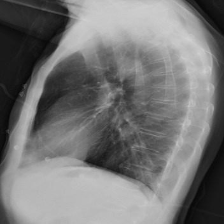

In [41]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from google.colab.patches import cv2_imshow

imagepath = "./covid-chestxray-dataset-master/images/000002-1.jpg"
img_m = cv.imread(imagepath)
img_m = cv.resize(img_m, (224, 224))

# display(Image(imagepath))
cv2_imshow(img_m)

pred [[0.00674176 0.99325824]]
Prediction: positive
Confidence
Negative: 0.007 Positive: 0.993
**DISCLAIMER**
Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.


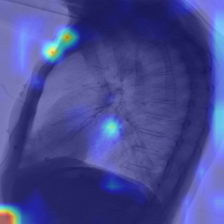

In [40]:
import cv2 as cv
import tensorflow.compat.v1 as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import os, argparse

from google.colab.patches import cv2_imshow

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img


 
# arguments:
IMAGE_PATH ="./covid-chestxray-dataset-master/images/000002-1.jpg"
output_node_names = "norm_dense_2/Softmax"
final_conv_name="post_relu/Relu"  #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
model_path = 'models/COVIDNet-CXR-2/model'

# USE COVIDNet CXR 2
args_weightspath = 'models/COVIDNet-CXR-2' 
args_metaname = 'model.meta'
args_ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'norm_dense_2/Softmax:0'
args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = False

args_in_tensorname = 'input_1:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 480
args_input_size_medusa = 256
args_top_percent = 0.08


# ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
# saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

with tf.Session() as sess:
    saver.restore(sess, model_path)  # load arguments using restore automatically


    img_m_0 = cv.imread(IMAGE_PATH)
    img_m_0 = cv.resize(img_m_0, (224, 224))
    # img_m = tf.cast(img_m_0, tf.float32)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

    '''
    /////////////////////////////////////////// inference related
    '''
    
    if args_is_severity_model:
      # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
      mapping = {'level2': 0, 'level1': 1}
      inv_mapping = {0: 'level2', 1: 'level1'}
    elif args_n_classes == 2:
      # For COVID-19 positive/negative detection
      mapping = {'negative': 0, 'positive': 1}
      inv_mapping = {0: 'negative', 1: 'positive'}
    elif args_n_classes == 3:
      # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
      mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
      inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
    else:
      raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
          or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

    '''
    \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    '''

    image_tensor = sess.graph.get_tensor_by_name("input_1:0") # args_in_tensorname "input_1:0"
    pred_tensor = sess.graph.get_tensor_by_name('norm_dense_2/Softmax:0') # args_out_tensorname 'norm_dense_2/Softmax:0'
    
    if args_is_medusa_backbone:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
        x = x.astype('float32') / 255.0
        medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
        medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
        feed_dict = {
                    medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                    image_tensor: np.expand_dims(x, axis=0),
                } 
        # print("args_is_medusa_backbone")
    else:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
        x = x.astype('float32') / 255.0
        feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
        # print("Not args_is_medusa_backbone")
    pred = sess.run(pred_tensor, feed_dict=feed_dict)
    print("pred", pred)

    print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
    print('Confidence')
    print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
    print('**DISCLAIMER**')
    print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

    
    # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
    # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
    # x = x.astype('float32') / 255.0
    # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


In [43]:
cv.imwrite(f'4-000002-1.jpg', dst_m)
# dst_m write into folder

True

In [44]:
!mv '4-000002-1.jpg' 'output/'

In [45]:
!cp -r 'output/' 'drive/MyDrive/covid'

## Change model

Not implement completely//

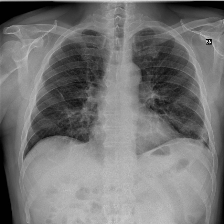

In [50]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from google.colab.patches import cv2_imshow

# imagepath = './covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg'
imagepath = "assets/ex-covid.jpeg"
img_m = cv.imread(imagepath)
img_m = cv.resize(img_m, (224, 224))

# display(Image(imagepath))
cv2_imshow(img_m)

In [ ]:
import cv2 as cv
import tensorflow.compat.v1 as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import os, argparse

from google.colab.patches import cv2_imshow

# def for inference
def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img

def process_image_file_medusa(filepath, size):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (size, size))
    img = img.astype('float64')
    img -= img.mean()
    img /= img.std()
    return np.expand_dims(img, -1)

# def for grad cam
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name: the name of softmax layer, label: name for label, 
    layer_name: the name of the last layer, sess,                 
    feed_dict, nb_classes: number of classes
    related url: https://github.com/cydonia999/Grad-CAM-in-TensorFlow/blob/master/grad-cam-tf.py
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3

    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img


 
# arguments:
IMAGE_PATH ="assets/ex-covid.jpeg"
output_node_names = "softmax/Softmax"
final_conv_name="private__identity_block_11/Relu_2"  
#private__identity_block_11/add, private__identity_block_11/Relu_2
model_path = 'models/COVIDNet-CXR-3/model'

# USE COVIDNet CXR 2
args_weightspath = 'models/COVIDNet-CXR-3' 
args_metaname = 'model.meta'
args_ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'softmax/Softmax:0'
# args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = True

args_in_tensorname = 'input_2:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 480
args_input_size_medusa = 256
args_top_percent = 0.08


# ckpt = tf.train.get_checkpoint_state(model_path)  # through checkpoint file to locate the model
saver = tf.train.import_meta_graph(model_path + '.meta')  # load graph structure, saved in .meta file

with tf.Session() as sess:
    saver.restore(sess, model_path)  # load arguments using restore automatically


    img_m_0 = cv.imread(IMAGE_PATH)
    img_m_0 = cv.resize(img_m_0, (224, 224))
    # img_m = tf.cast(img_m_0, tf.float32)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3

    '''
    /////////////////////////////////////////// inference related
    '''
    
    if args_is_severity_model:
      # For COVIDNet CXR-S training with COVIDxSev level 1 and level 2 air space seveirty grading
      mapping = {'level2': 0, 'level1': 1}
      inv_mapping = {0: 'level2', 1: 'level1'}
    elif args_n_classes == 2:
      # For COVID-19 positive/negative detection
      mapping = {'negative': 0, 'positive': 1}
      inv_mapping = {0: 'negative', 1: 'positive'}
    elif args_n_classes == 3:
      # For detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia
      mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
      inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
    else:
      raise Exception('''COVID-Net currently only supports 2 class COVID-19 positive/negative detection
          or 3 class detection of no pneumonia/non-COVID-19 pneumonia/COVID-19 pneumonia''')

    '''
    \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
    '''

    image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname) # args_in_tensorname "input_1:0"
    pred_tensor = sess.graph.get_tensor_by_name(args_out_tensorname) # args_out_tensorname 'norm_dense_2/Softmax:0'
    
    if args_is_medusa_backbone:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=0, crop=False)
        x = x.astype('float32') / 255.0
        medusa_image_tensor = sess.graph.get_tensor_by_name(args_in_tensorname_medusa)
        medusa_x = process_image_file_medusa(IMAGE_PATH, args_input_size_medusa)
        feed_dict = {
                    medusa_image_tensor: np.expand_dims(medusa_x, axis=0),
                    image_tensor: np.expand_dims(x, axis=0),
                } 
        # print("args_is_medusa_backbone")
    else:
        x = process_image_file(IMAGE_PATH, args_input_size, top_percent=args_top_percent)
        x = x.astype('float32') / 255.0
        feed_dict = {image_tensor: np.expand_dims(x, axis=0)}
        # print("Not args_is_medusa_backbone")
    pred = sess.run(pred_tensor, feed_dict=feed_dict)
    print("pred", pred)

    print('Prediction: {}'.format(inv_mapping[pred.argmax(axis=1)[0]]))
    print('Confidence')
    print(' '.join('{}: {:.3f}'.format(cls.capitalize(), pred[0][i]) for cls, i in mapping.items()))
    print('**DISCLAIMER**')
    print('Do not use this prediction for self-diagnosis. You should check with your local authorities for the latest advice on seeking medical assistance.')

    
    # input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")
    # # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    # x = process_image_file(IMAGE_PATH, 480, top_percent=0.08) # IMAGE_PATH = 'assets/ex-covid.jpeg'
    # x = x.astype('float32') / 255.0
    # # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    # # print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict=feed_dict, # feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


# Compare differing final layer of CNN